In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [14]:
class FuzzyCMeans:
    
    def __init__(self, X, n_clusters, n_iter=100, limit=1e-3, p=2):
        self.X = X
        self.n_clusters = n_clusters
        self.n_iter = n_iter
        self.limit = limit
        self.p = p
        self.error = 0
        self.distance_matrix = None
        self.centroids = np.zeros((self.n_clusters, len(self.X[0])))
        self.membership_matrix = self.init_membership_matrix()

            
    def init_membership_matrix(self):
        temp = np.zeros((1, self.n_clusters))
        for i in range(len(self.X)):
            temp = np.append(temp, np.reshape(np.random.dirichlet(np.ones(self.n_clusters), size=1), (1, self.n_clusters)), axis=0)
        return temp[1:]
    
    def update_centroids(self):
        for k in range(self.n_clusters):
            for i in range(len(self.X[0])):
                num, den = (0, 0)
                for j in range(len(self.X)):
                    num = num + (self.X[j][i] * pow(self.membership_matrix[j][k], self.p))
                    den = den + (pow(self.membership_matrix[j][k], self.p))
                self.centroids[k][i] = num / den
                
    def update_distance_matrix(self):
        if self.distance_matrix is None:
            self.distance_matrix = np.zeros((len(self.X), self.n_clusters))
            
        for i in range(len(self.X)):
            for j in range(self.n_clusters):
                self.distance_matrix[i][j] = np.linalg.norm(self.X[i] - self.centroids[j])
    
    def update_membership_matrix(self):
        for i in range(len(self.X)):
            for j in range(self.n_clusters):
                u1, u2 = (pow(1 / self.distance_matrix[i][j], 1 / (self.p - 1)), 0)
                for k in range(self.n_clusters):
                    u2 = u2 + pow(1 / self.distance_matrix[i][k], 1 / (self.p-1))
                self.membership_matrix[i][j] = u1 / u2
                
    def calculate_error(self):
        error = 0
        for i in range(len(self.X)):
            for j in range(self.n_clusters):
                error = error + (pow(self.membership_matrix[i][j], self.p) * pow(self.distance_matrix[i][j], 2))
        self.error = error
        
    def train(self):
        for i in range(self.n_iter):
            old_centroids = np.copy(self.centroids)
            old_error = self.error
            self.update_centroids()
            self.update_distance_matrix()
            self.update_membership_matrix()
            self.calculate_error()
            
            if (abs(old_error - self.error) < self.limit) or 
                (np.sum(np.abs(old_centroids - self.centroids)) < 0.0001):
                break
                
    @classmethod
    def plot_elbow_curve(cls, X, start, end, step):
        errors = []
        n_cluster = []
        for i in range(start, end + 1, step):
            n_cluster.append(i)
            temp_obj = FuzzyCMeans(X, i)
            temp_obj.train()
            errors.append(temp_obj.error)
        
        plt.plot(n_cluster, errors, marker='o')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Error')
        plt.title("Fuzzy - CMeans")

In [15]:
data = pd.read_pickle('./state_clubbed_df.pickle')
data

,state,year,murder,rape,foeticide,kidnapping and abduction,abetment of suicide,exposure and abandonment,procuration of minor girls,selling girls for prostitution,prohibition of child marriage act,other crimes,total
0,andhra pradesh,2001,35.0,84.0,0.0,57.0,7.0,22.0,12.0,0.0,6.0,47.0,270.0
1,arunachal pradesh,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,assam,2001,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
3,bihar,2001,2.0,16.0,0.0,26.0,0.0,1.0,16.0,1.0,2.0,18.0,83.0
4,chhattisgarh,2001,14.0,150.0,5.0,46.0,1.0,15.0,0.0,0.0,0.0,354.0,585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,d&n haveli,2015,2.0,2.0,0.0,14.0,0.0,2.0,0.0,0.0,0.0,2.0,35.0
523,daman & diu,2015,1.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
524,delhi,2015,54.0,927.0,3.0,6881.0,0.0,23.0,0.0,6.0,0.0,231.0,9489.0
525,lakshadweep,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [16]:
all_headers = data.columns
all_headers

Index(['state', 'year', 'murder', 'rape', 'foeticide',
       'kidnapping and abduction', 'abetment of suicide',
       'exposure and abandonment', 'procuration of minor girls',
       'selling girls for prostitution', 'prohibition of child marriage act',
       'other crimes', 'total'],
      dtype='object')

In [17]:
cols_to_norm = all_headers[2:-1]
print (cols_to_norm)

Index(['murder', 'rape', 'foeticide', 'kidnapping and abduction',
       'abetment of suicide', 'exposure and abandonment',
       'procuration of minor girls', 'selling girls for prostitution',
       'prohibition of child marriage act', 'other crimes'],
      dtype='object')


In [18]:
data[cols_to_norm] = StandardScaler().fit_transform(data[cols_to_norm])
data

,state,year,murder,rape,foeticide,kidnapping and abduction,abetment of suicide,exposure and abandonment,procuration of minor girls,selling girls for prostitution,prohibition of child marriage act,other crimes,total
0,andhra pradesh,2001,-0.088951,-0.293383,-0.422895,-0.331227,0.899853,-0.024876,-0.085015,-0.183679,0.287960,-0.288916,270.0
1,arunachal pradesh,2001,-0.518114,-0.556170,-0.422895,-0.391738,-0.281905,-0.435728,-0.216594,-0.183679,-0.442216,-0.386870,0.0
2,assam,2001,-0.518114,-0.556170,-0.422895,-0.372629,-0.281905,-0.435728,-0.216594,-0.183679,-0.442216,-0.386870,18.0
3,bihar,2001,-0.493590,-0.506115,-0.422895,-0.364137,-0.281905,-0.417052,-0.041155,-0.092531,-0.198824,-0.349356,83.0
4,chhattisgarh,2001,-0.346449,-0.086907,0.247176,-0.342905,-0.113082,-0.155602,-0.216594,-0.183679,-0.442216,0.350914,585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,d&n haveli,2015,-0.493590,-0.549913,-0.422895,-0.376876,-0.281905,-0.398377,-0.216594,-0.183679,-0.442216,-0.382702,35.0
523,daman & diu,2015,-0.505852,-0.556170,-0.422895,-0.369445,-0.281905,-0.435728,-0.216594,-0.183679,-0.442216,-0.386870,28.0
524,delhi,2015,0.144024,2.343874,-0.020852,6.913125,-0.281905,-0.006201,-0.216594,0.363206,-0.442216,0.094565,9489.0
525,lakshadweep,2015,-0.518114,-0.556170,-0.422895,-0.391738,-0.281905,-0.435728,-0.216594,-0.183679,-0.442216,-0.384786,2.0


In [19]:
from sklearn.decomposition import PCA

In [20]:
n_features = len(cols_to_norm)
n_features

10

([<matplotlib.axis.XTick at 0x7f7f5c099810>,
 <a list of 10 Text major ticklabel objects>)

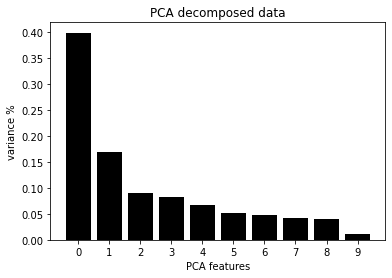

In [21]:
pca = PCA(n_components=n_features)
principal_components = pca.fit_transform(data[cols_to_norm])
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.title("PCA decomposed data")
plt.xticks(features)

In [22]:
PCA_components = pd.DataFrame(principal_components)
PCA_components = pd.concat([data[all_headers[:2]], PCA_components], axis=1)
PCA_components

,state,year,0,1,2,3,4,5,6,7,8,9
0,andhra pradesh,2001,-0.228578,0.050406,-0.015284,0.077617,1.136721,0.092307,-0.091301,-0.145122,-0.089485,0.033815
1,arunachal pradesh,2001,-1.230578,-0.237921,0.052646,0.128528,0.026222,0.005559,-0.038765,-0.058334,0.084726,-0.047396
2,assam,2001,-1.224106,-0.236560,0.063344,0.124093,0.021058,0.006804,-0.048214,-0.063043,0.084377,-0.054286
3,bihar,2001,-1.098062,0.019818,-0.019305,0.059215,0.049078,0.067003,-0.063323,0.000515,0.120980,-0.030040
4,chhattisgarh,2001,-0.259834,-0.514825,-0.238040,0.487728,-0.216056,0.063617,0.073489,0.120414,0.188045,-0.097552
...,...,...,...,...,...,...,...,...,...,...,...,...
522,d&n haveli,2015,-1.199630,-0.241129,0.050680,0.107484,0.023192,-0.005381,-0.024836,-0.079391,0.077469,-0.053733
523,daman & diu,2015,-1.218726,-0.236485,0.069565,0.118951,0.021436,0.005134,-0.041887,-0.060349,0.080739,-0.056002
524,delhi,2015,3.331256,0.160154,4.280642,-1.419158,-2.641531,-0.006094,-3.416160,-1.727422,0.523969,-0.633911
525,lakshadweep,2015,-1.229735,-0.238179,0.052339,0.129081,0.026050,0.005640,-0.038320,-0.057920,0.086116,-0.048306


<module 'matplotlib.pyplot' from '/home/pranjal/.local/share/virtualenvs/crime-analysis-report-pk3Cf-oK/lib/python3.7/site-packages/matplotlib/pyplot.py'>

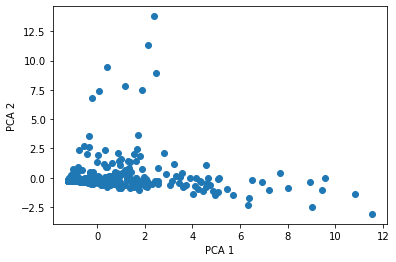

In [23]:
plt.scatter(PCA_components[0], PCA_components[1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt

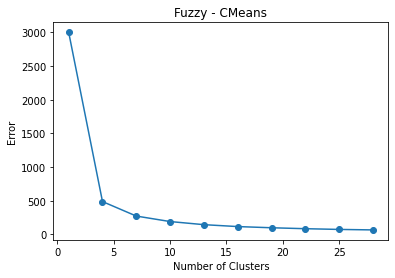

In [25]:
FuzzyCMeans.plot_elbow_curve(PCA_components.loc[:, [0,1]].to_numpy(), 1, 30, 3)

In [28]:
clusterer = FuzzyCMeans(PCA_components.loc[:, [0,1]].to_numpy(), n_clusters=5)
clusterer.train()

In [30]:
clusterer.centroids

array([[ 4.40386618, -0.23130725],
       [ 1.57505554,  0.28172647],
       [ 1.32597336,  0.48189678],
       [ 0.51599538,  0.12805854],
       [-1.07831009, -0.20244745]])

Text(0.5, 1.0, 'FuzzyCMeans')

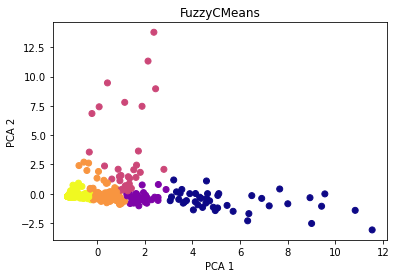

In [44]:
labels = np.argmax(clusterer.membership_matrix, axis=1)
plt.scatter(PCA_components[0], PCA_components[1], c=labels, cmap='plasma')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('FuzzyCMeans')